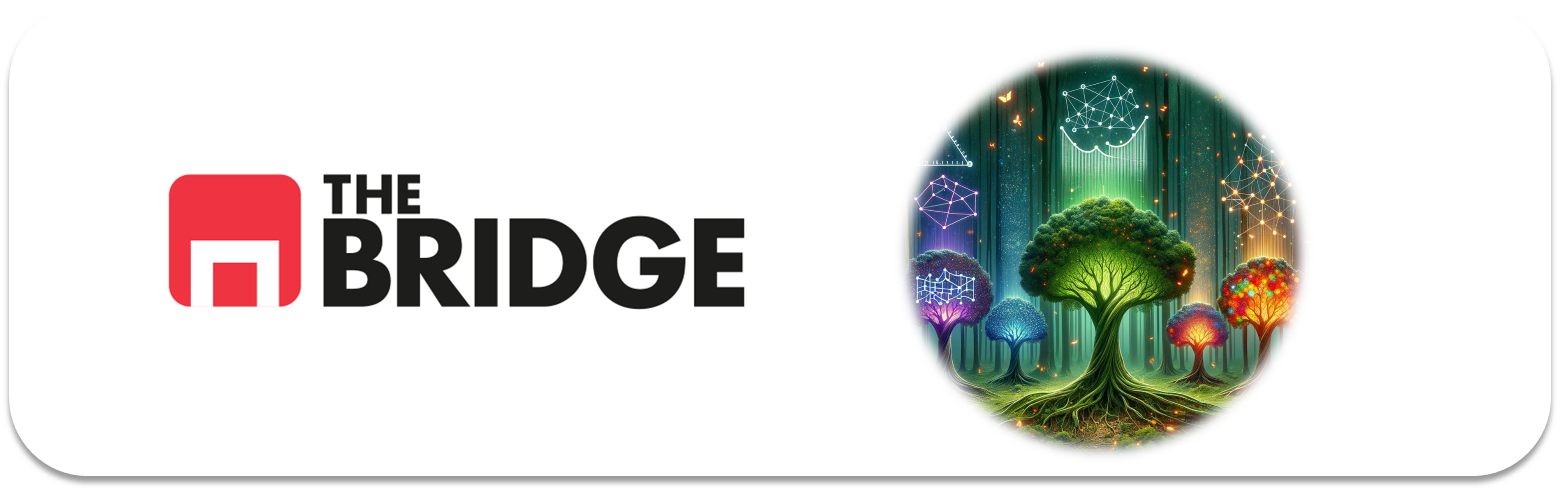

## PRACTICA OBLIGATORIA: **Arboles de Decisión y Ajuste de hiperparámetros**

* La práctica obligatoria de esta unidad consiste en encontrar el mejor modelo para resolver un problema de predicción de si los destinatarios de una campaña de marketing adquirirán un producto concreto. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.  
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo. 
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso. 

### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook.

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns


from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor
from sklearn.metrics import classification_report,accuracy_score
from sklearn.model_selection import ShuffleSplit


### Descripción

En el directorio data encontrarás un dataset que contiene datos relacionados con campañas de marketing directo de una institución bancaria portuguesa (es el dataset "Bank Marketing" de la UCI Machine Learning Repository). Los datos se recopilaron de campañas de marketing telefónico, donde el objetivo principal era predecir si el cliente se suscribiría a un depósito a plazo.

La práctica consiste en completar el proceso de creación de un modelo basado en árboles de decisión que permita predecir si un cliente (dadas unas características similares a las del dataset) "comprará" el depósito a plazo. Sigue los pasos necesarios de un proceso de ML para crear el modelo, optimizar sus hiperparámetros, comparar los resultados de esa optimización con una regresión logística (sin optimizar, con sus hiperparámetros por defecto) y finalmente evaluarlo contra test y hacer una pequeña valoración del resultado obtenido.

Tendrás que hacer la limpieza, split, minieda, selección, tratamiento, primeros entrenamientos, optimización, comparación y evaluación según tu mejor criterio. Eso sí, es obligatorio:
- Identificar el target y analizar su distribución
- Realizar una optimización de hiperparámetros, escogiendo un grid medianemante razonado
- Comparar con el modelo baseline
- Evaluar contra test

AYUDA: La dirección del banco nos proporciona estas notas (en inglés):

 
   **bank client data:**  
   1 - age (numeric)  
   2 - job : type of job (categorical: "admin.","unknown","unemployed","management","housemaid","entrepreneur","student",
                                       "blue-collar","self-employed","retired","technician","services")   
   3 - marital : marital status (categorical: "married","divorced","single"; note: "divorced" means divorced or widowed)  
   4 - education (categorical: "unknown","secondary","primary","tertiary")  
   5 - default: has credit in default? (binary: "yes","no")  
   6 - balance: average yearly balance, in euros (numeric)   
   7 - housing: has housing loan? (binary: "yes","no")  
   8 - loan: has personal loan? (binary: "yes","no")   

   **related with the last contact of the current campaign:**  
   9 - contact: contact communication type (categorical: "unknown","telephone","cellular")   
  10 - day: last contact day of the month (numeric)  
  11 - month: last contact month of year (categorical: "jan", "feb", "mar", ..., "nov", "dec")  
  12 - duration: last contact duration, in seconds (numeric)    

   **other attributes:**  
  13 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)  
  14 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric, -1 means client was not previously contacted)  
  15 - previous: number of contacts performed before this campaign and for this client (numeric)  
  16 - poutcome: outcome of the previous marketing campaign (categorical: "unknown","other","failure","success")

  

In [3]:
#obtener datos
df = pd.read_csv('./bank-full.csv',sep=";")


In [4]:
#ojeo de los datos
df.head(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
5,35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,-1,0,unknown,no
6,28,management,single,tertiary,no,447,yes,yes,unknown,5,may,217,1,-1,0,unknown,no
7,42,entrepreneur,divorced,tertiary,yes,2,yes,no,unknown,5,may,380,1,-1,0,unknown,no
8,58,retired,married,primary,no,121,yes,no,unknown,5,may,50,1,-1,0,unknown,no
9,43,technician,single,secondary,no,593,yes,no,unknown,5,may,55,1,-1,0,unknown,no


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [6]:
#Limpieza
duplicados=df.duplicated()
duplicados.value_counts(True)

False    1.0
Name: proportion, dtype: float64

In [7]:
df.contact.value_counts(True)

contact
cellular     0.647741
unknown      0.287983
telephone    0.064276
Name: proportion, dtype: float64

In [8]:
df.poutcome.value_counts(True)

poutcome
unknown    0.817478
failure    0.108403
other      0.040698
success    0.033421
Name: proportion, dtype: float64

In [9]:
df.education.value_counts(True)

education
secondary    0.513194
tertiary     0.294198
primary      0.151534
unknown      0.041074
Name: proportion, dtype: float64

In [10]:
df.drop(["poutcome"],axis=1,inplace=True)

In [11]:
num_inputs = ['age', 'balance', 'duration', 'day', 'campaign', 'pdays', 'previous']
num_inputs_tar = ['age', 'balance', 'duration', 'day', 'campaign', 'pdays', 'previous','y']
cat_inputs = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month']
target = 'y'

In [12]:
mapping = {'no': 0, 'yes': 1}
df['y'] = df['y'].map(mapping)

In [13]:
#Train/test spliting
train_set, test_set = train_test_split(df, test_size= 0.2, random_state= 42)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


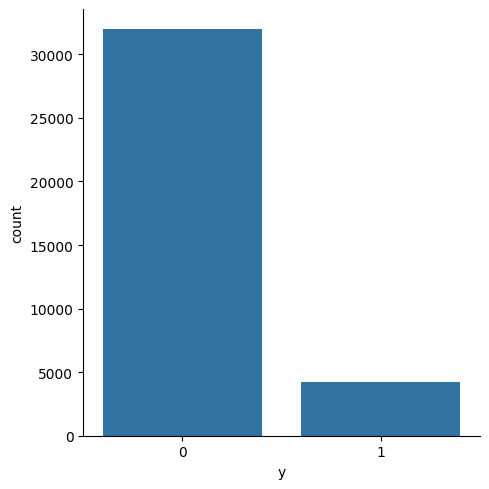

In [14]:
#Mini EDA

sns.catplot(x = 'y', kind = 'count', data = train_set)

Target muy desbalanceado

In [15]:
for col in cat_inputs:
    print('valores únicos "{}":\n {}'.format(col, df[col].unique()))

valores únicos "job":
 ['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'admin.' 'services' 'self-employed' 'unemployed' 'housemaid'
 'student']
valores únicos "marital":
 ['married' 'single' 'divorced']
valores únicos "education":
 ['tertiary' 'secondary' 'unknown' 'primary']
valores únicos "default":
 ['no' 'yes']
valores únicos "housing":
 ['yes' 'no']
valores únicos "loan":
 ['no' 'yes']
valores únicos "contact":
 ['unknown' 'cellular' 'telephone']
valores únicos "month":
 ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr' 'sep']


In [16]:
col_unknwn = ['job', 'education', 'contact']
for col in col_unknwn:
    proportion = df[df[col]=='unknown'][col].count()/df[col].count()
    print('Unknown \"{}\": {:.1%}'.format(col, proportion))

Unknown "job": 0.6%
Unknown "education": 4.1%
Unknown "contact": 28.8%


In [17]:
df[num_inputs_tar].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   age       45211 non-null  int64
 1   balance   45211 non-null  int64
 2   duration  45211 non-null  int64
 3   day       45211 non-null  int64
 4   campaign  45211 non-null  int64
 5   pdays     45211 non-null  int64
 6   previous  45211 non-null  int64
 7   y         45211 non-null  int64
dtypes: int64(8)
memory usage: 2.8 MB


In [18]:
# variables numéricas
'''sns.pairplot(train_set,
            hue='y',
            height=4,
            vars=num_inputs_tar); '''

"sns.pairplot(train_set,\n            hue='y',\n            height=4,\n            vars=num_inputs_tar); "

In [19]:
train_set.corr(numeric_only= True)

,age,balance,day,duration,campaign,pdays,previous,y
age,1.000000,0.098921,-0.007882,-0.007414,0.003160,-0.023231,0.002397,0.026684
balance,0.098921,1.000000,0.000455,0.025590,-0.018566,0.002122,0.015291,0.052518
day,-0.007882,0.000455,1.000000,-0.025719,0.160599,-0.094405,-0.053229,-0.025887
duration,-0.007414,0.025590,-0.025719,1.000000,-0.086526,-0.001179,0.002557,0.393402
campaign,0.003160,-0.018566,0.160599,-0.086526,1.000000,-0.089317,-0.033300,-0.072571
pdays,-0.023231,0.002122,-0.094405,-0.001179,-0.089317,1.000000,0.440662,0.105742
previous,0.002397,0.015291,-0.053229,0.002557,-0.033300,0.440662,1.000000,0.092051
y,0.026684,0.052518,-0.025887,0.393402,-0.072571,0.105742,0.092051,1.000000


In [20]:
correlaciones_absolutas = np.abs(train_set.corr(numeric_only= True)["y"])
correlaciones_ordenadas = correlaciones_absolutas.sort_values(ascending=False)
correlaciones_ordenadas

y           1.000000
duration    0.393402
pdays       0.105742
previous    0.092051
campaign    0.072571
balance     0.052518
age         0.026684
day         0.025887
Name: y, dtype: float64

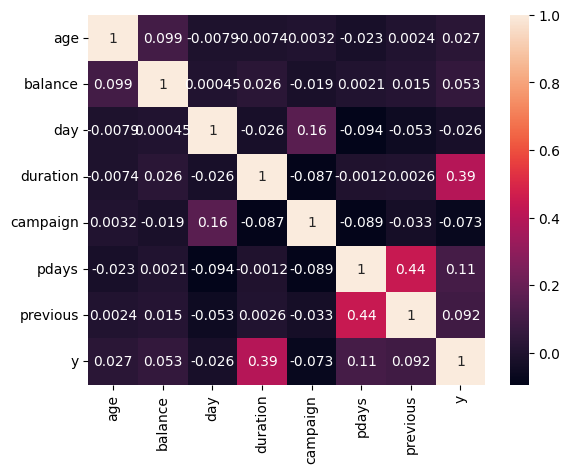

In [21]:
sns.heatmap(train_set.corr(numeric_only = True),annot=True);
plt.show();

In [22]:
variables_num=["duration","pdays"]#también valoro previous, pero como correla con pdyas fuera.

In [23]:
train_set.drop(columns=["previous","campaign","balance","age","day"],inplace=True)

In [24]:
#variables categóricas
cat_inputs = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month']

In [25]:
from bootcampviztools import *

job


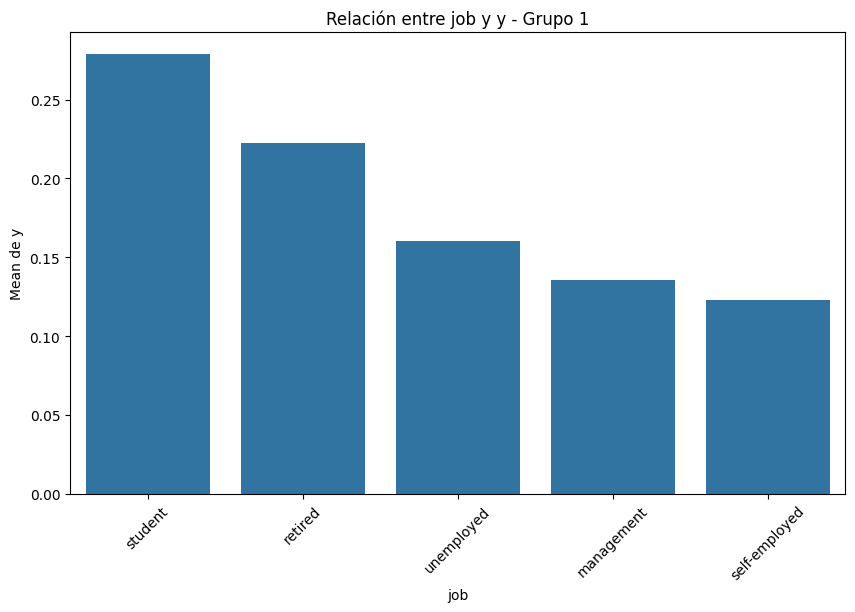

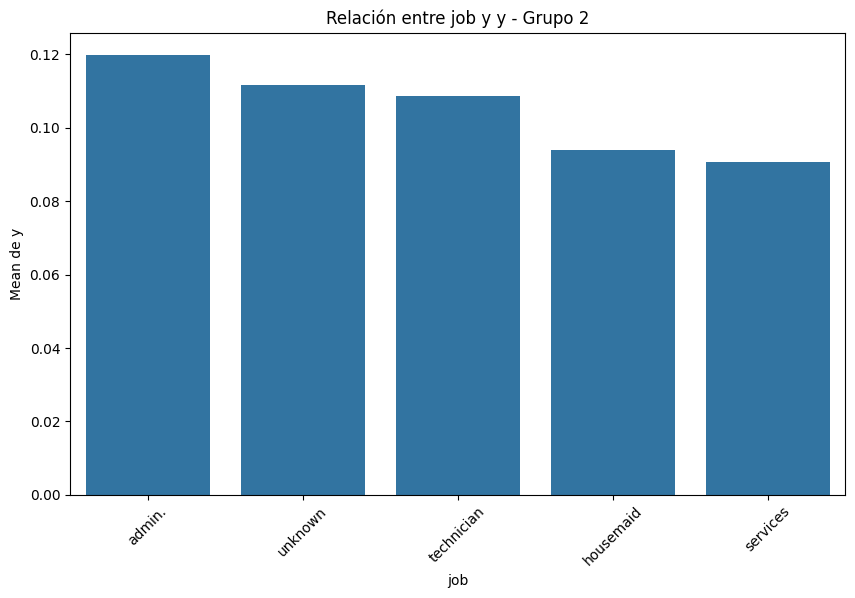

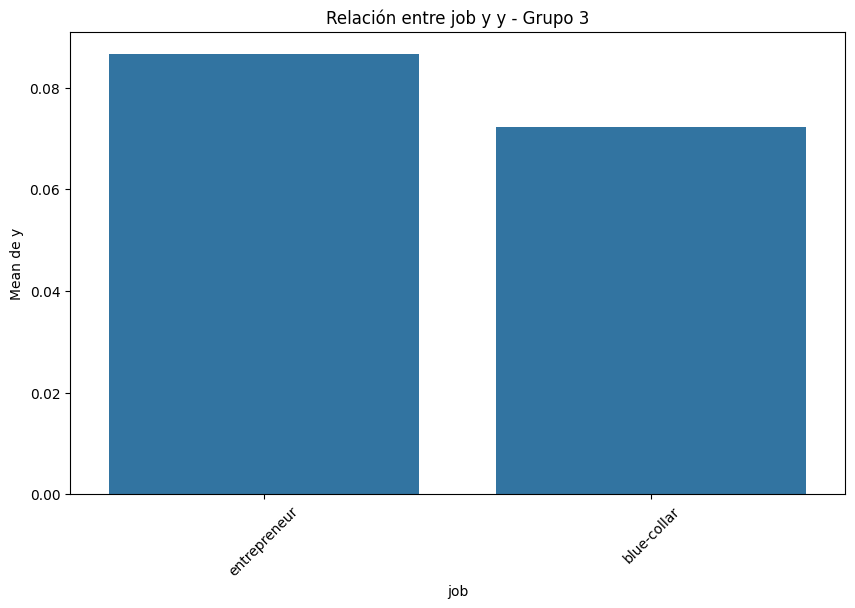

marital


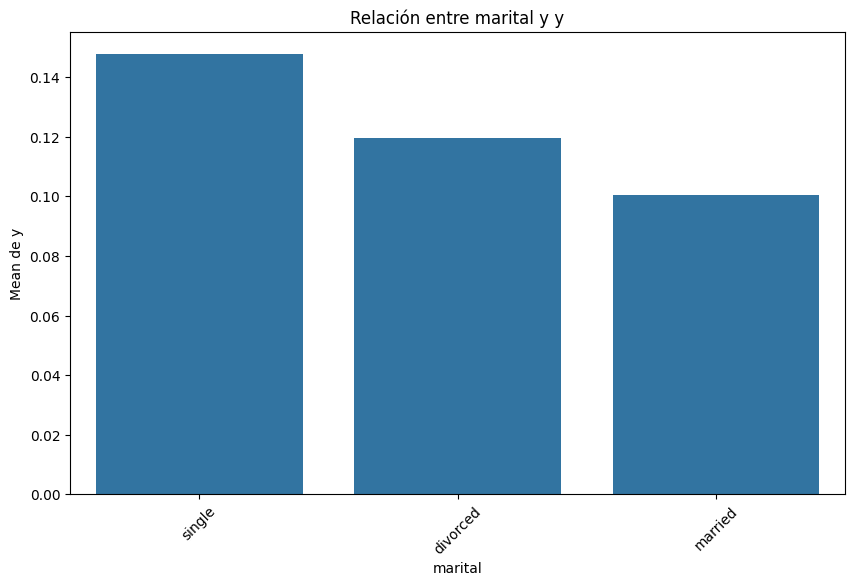

education


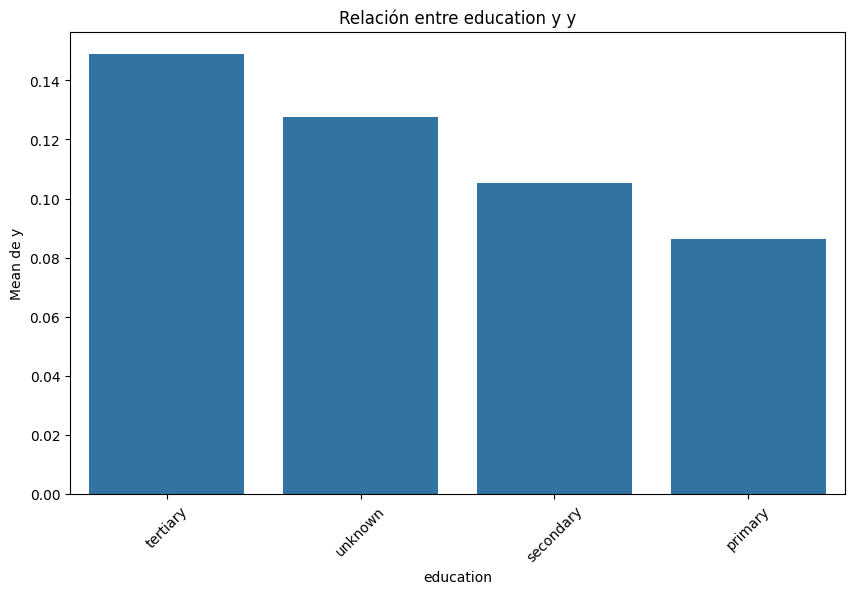

default


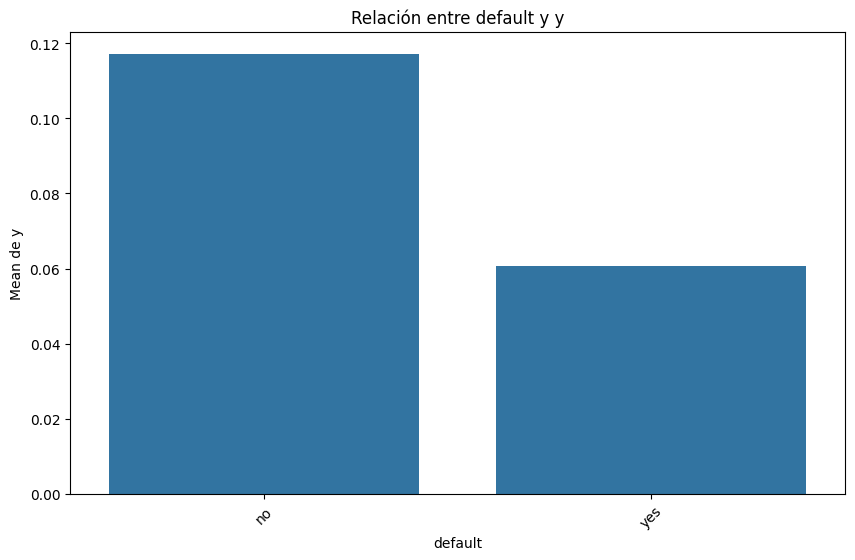

housing


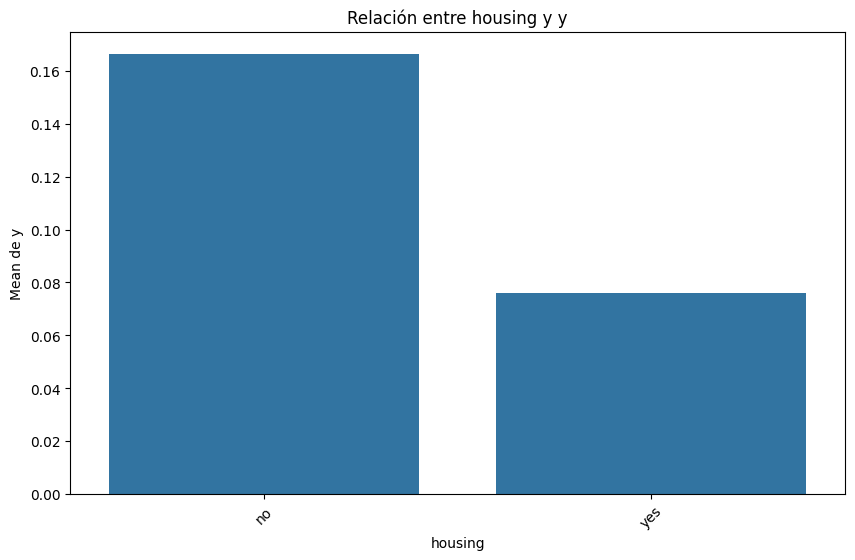

loan


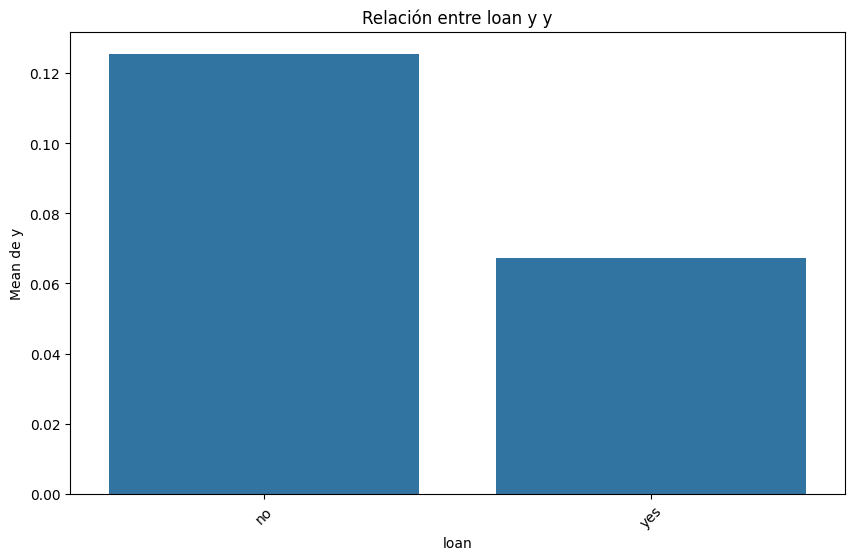

contact


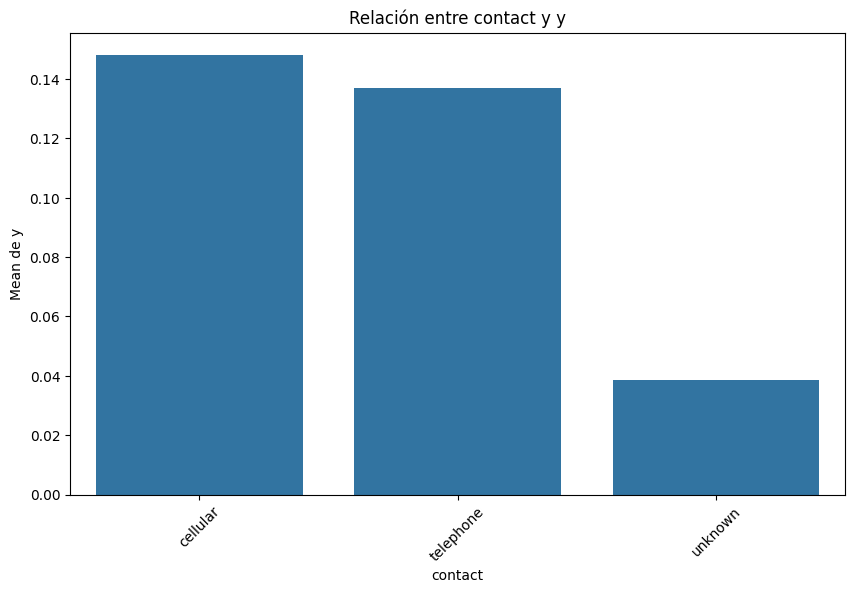

month


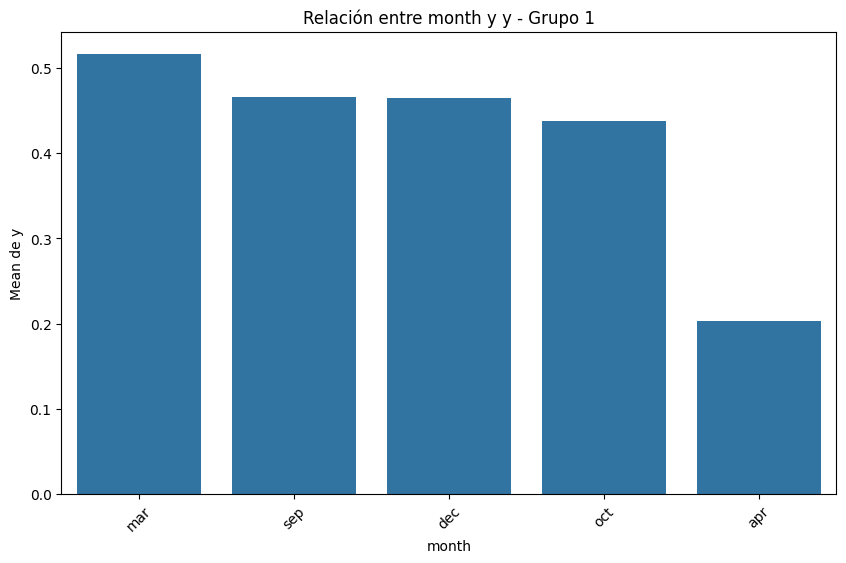

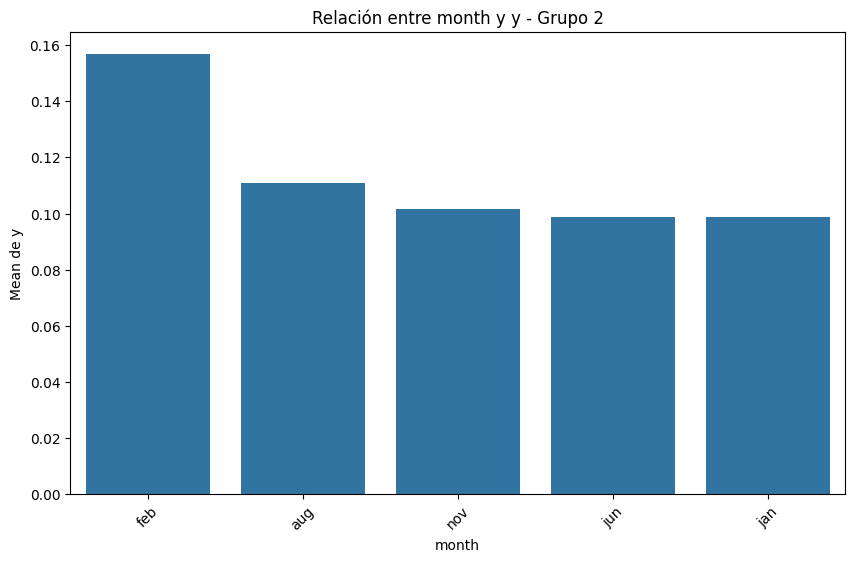

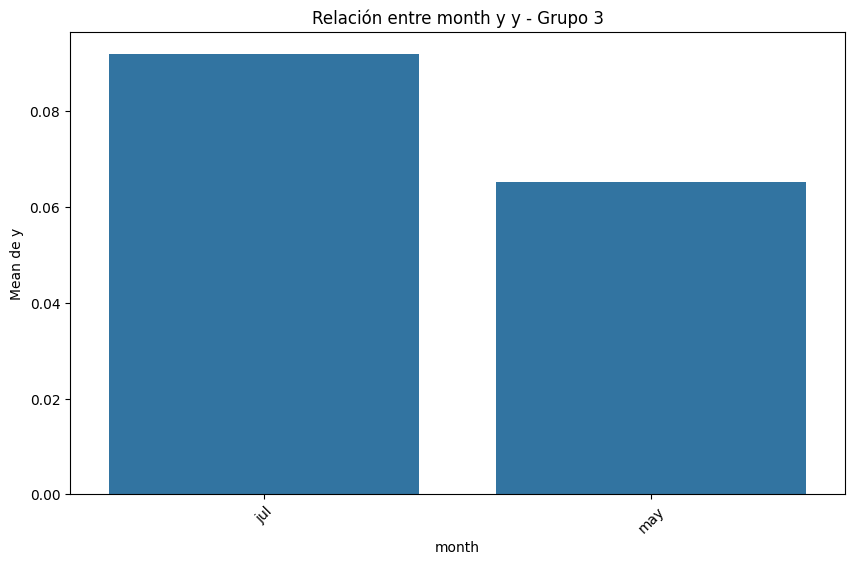

In [26]:
for variable in cat_inputs:
    print(variable)
    plot_categorical_numerical_relationship(train_set, variable, 'y')

In [27]:
#veo variación en la distribución de y en todas las categóricas
variables_cat = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month']

In [28]:
#Tratamiento de features

In [29]:
train_set[variables_num].info()

<class 'pandas.core.frame.DataFrame'>
Index: 36168 entries, 3344 to 15795
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   duration  36168 non-null  int64
 1   pdays     36168 non-null  int64
dtypes: int64(2)
memory usage: 847.7 KB


In [30]:
train_set[variables_cat].info()

<class 'pandas.core.frame.DataFrame'>
Index: 36168 entries, 3344 to 15795
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   job        36168 non-null  object
 1   marital    36168 non-null  object
 2   education  36168 non-null  object
 3   default    36168 non-null  object
 4   housing    36168 non-null  object
 5   loan       36168 non-null  object
 6   contact    36168 non-null  object
 7   month      36168 non-null  object
dtypes: object(8)
memory usage: 2.5+ MB


In [31]:
train_set[variables_cat].head(10)

,job,marital,education,default,housing,loan,contact,month
3344,blue-collar,married,primary,no,yes,no,unknown,may
17965,technician,married,primary,no,yes,no,cellular,jul
18299,admin.,married,secondary,no,no,no,cellular,jul
10221,management,single,tertiary,no,yes,no,unknown,jun
32192,blue-collar,married,primary,no,no,no,cellular,apr
23098,technician,single,secondary,no,no,no,cellular,aug
6633,management,single,tertiary,no,yes,no,unknown,may
313,services,divorced,secondary,no,yes,yes,unknown,may
12525,services,married,secondary,no,no,no,unknown,jul
44313,technician,married,tertiary,no,no,no,cellular,jul


In [32]:
mapping_yn = {'no': 0, 'yes': 1}
col_binary = ['default', 'housing', 'loan']
for col in col_binary:
    train_set[col] = train_set[col].map(mapping_yn)

In [33]:
train_set[variables_cat].head(10)

,job,marital,education,default,housing,loan,contact,month
3344,blue-collar,married,primary,0,1,0,unknown,may
17965,technician,married,primary,0,1,0,cellular,jul
18299,admin.,married,secondary,0,0,0,cellular,jul
10221,management,single,tertiary,0,1,0,unknown,jun
32192,blue-collar,married,primary,0,0,0,cellular,apr
23098,technician,single,secondary,0,0,0,cellular,aug
6633,management,single,tertiary,0,1,0,unknown,may
313,services,divorced,secondary,0,1,1,unknown,may
12525,services,married,secondary,0,0,0,unknown,jul
44313,technician,married,tertiary,0,0,0,cellular,jul


In [34]:
#month_map = {'may':5, 'jun':6, 'jul':7, 'aug':8 ,'oct':10, 'nov':11, 'dec':12, 'jan':1, 'feb':2, 'mar':3, 'apr':4, 'sep':9}
#train_set['month'] = train_set.month.map(month_map).astype('int')

In [35]:
edu_map = {'unknown':0, 'primary':1, 'secondary':2, 'tertiary':3}
train_set['education'] = train_set.education.map(edu_map).astype('int')

In [36]:
train_set

,job,marital,education,default,housing,loan,contact,month,duration,pdays,y
3344,blue-collar,married,1,0,1,0,unknown,may,72,-1,0
17965,technician,married,1,0,1,0,cellular,jul,269,-1,0
18299,admin.,married,2,0,0,0,cellular,jul,130,-1,0
10221,management,single,3,0,1,0,unknown,jun,375,-1,0
32192,blue-collar,married,1,0,0,0,cellular,apr,264,-1,1
...,...,...,...,...,...,...,...,...,...,...,...
11284,housemaid,single,1,0,0,0,unknown,jun,2093,-1,1
44732,student,single,3,0,0,0,cellular,sep,210,92,0
38158,technician,divorced,3,0,1,0,cellular,may,239,-1,0
860,retired,married,2,0,0,0,unknown,may,111,-1,0


In [37]:
cols_dumm = ['job', 'marital', 'contact','month']
train_set = pd.get_dummies(train_set, columns=cols_dumm,dtype= "int")

In [38]:
train_set[variables_num].describe()

,duration,pdays
count,36168.000000,36168.000000
mean,256.891202,40.180076
std,256.884103,100.107617
min,0.000000,-1.000000
25%,103.000000,-1.000000
50%,180.000000,-1.000000
75%,318.000000,-1.000000
max,4918.000000,871.000000


In [39]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
train_set[variables_num] = scaler.fit_transform(train_set[variables_num])

In [40]:
train_set

,education,default,housing,loan,duration,pdays,y,job_admin.,job_blue-collar,job_entrepreneur,...,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep
3344,1,0,1,0,0.014640,0.000000,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
17965,1,0,1,0,0.054697,0.000000,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
18299,2,0,0,0,0.026434,0.000000,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
10221,3,0,1,0,0.076251,0.000000,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
32192,1,0,0,0,0.053680,0.000000,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11284,1,0,0,0,0.425580,0.000000,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
44732,3,0,0,0,0.042700,0.106651,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
38158,3,0,1,0,0.048597,0.000000,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
860,2,0,0,0,0.022570,0.000000,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [41]:
#aplico el mismo procesamiento a test
test_set

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,y
3776,40,blue-collar,married,secondary,no,580,yes,no,unknown,16,may,192,1,-1,0,0
9928,47,services,single,secondary,no,3644,no,no,unknown,9,jun,83,2,-1,0,0
33409,25,student,single,tertiary,no,538,yes,no,cellular,20,apr,226,1,-1,0,0
31885,42,management,married,tertiary,no,1773,no,no,cellular,9,apr,311,1,336,1,0
15738,56,management,married,tertiary,no,217,no,yes,cellular,21,jul,121,2,-1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13353,47,management,married,tertiary,no,1890,no,no,cellular,8,jul,161,1,-1,0,0
38732,32,blue-collar,single,secondary,no,217,yes,no,cellular,15,may,692,3,-1,0,1
5654,52,admin.,divorced,secondary,no,0,yes,no,unknown,26,may,206,1,-1,0,0
3779,40,admin.,divorced,secondary,no,783,yes,yes,unknown,16,may,171,2,-1,0,0


In [42]:
test_set.drop(columns=["previous","campaign","balance","age","day"],inplace=True)

mapping_yn = {'no': 0, 'yes': 1}
col_binary = ['default', 'housing', 'loan']
for col in col_binary:
    test_set[col] = test_set[col].map(mapping_yn)

#month_map = {'may':5, 'jun':6, 'jul':7, 'aug':8 ,'oct':10, 'nov':11, 'dec':12, 'jan':1, 'feb':2, 'mar':3, 'apr':4, 'sep':9}
#test_set['month'] = test_set.month.map(month_map).astype('int')

edu_map = {'unknown':0, 'primary':1, 'secondary':2, 'tertiary':3}
test_set['education'] = test_set.education.map(edu_map).astype('int')

cols_dumm = ['job', 'marital', 'contact',"month"]
test_set = pd.get_dummies(test_set, columns=cols_dumm,dtype= "int")

test_set[variables_num] = scaler.fit_transform(test_set[variables_num])

In [43]:
test_set

,education,default,housing,loan,duration,pdays,y,job_admin.,job_blue-collar,job_entrepreneur,...,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep
3776,2,0,1,0,0.060320,0.000000,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
9928,2,0,0,0,0.026076,0.000000,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
33409,3,0,1,0,0.071002,0.000000,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
31885,3,0,0,0,0.097707,0.399763,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
15738,3,0,0,1,0.038014,0.000000,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13353,3,0,0,0,0.050581,0.000000,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
38732,2,0,1,0,0.217405,0.000000,1,0,1,0,...,0,0,0,0,0,0,1,0,0,0
5654,2,0,1,0,0.064719,0.000000,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
3779,2,0,1,1,0.053723,0.000000,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0


In [44]:
#Construyo las parejas X,y de train y test.
y_train=train_set["y"]
y_test=test_set["y"]
X_train=train_set.drop("y",axis=1)
X_test=test_set.drop("y",axis=1)


In [45]:
#aplico RL
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression() 
clf.fit(X_train, y_train)

LogisticRegression()

In [46]:
pred_train_clf = clf.predict(X_train)
pred_test_clf = clf.predict(X_test)

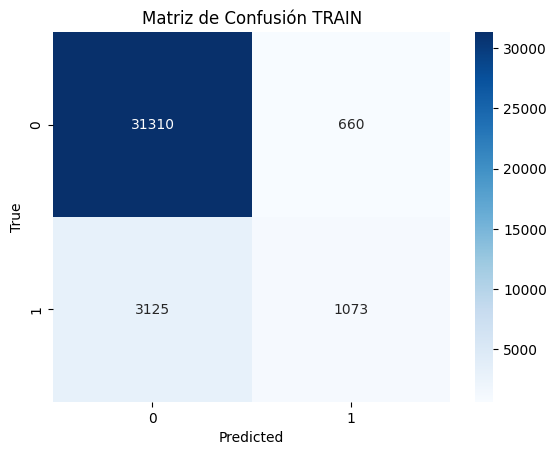

              precision    recall  f1-score   support

           0       0.91      0.98      0.94     31970
           1       0.62      0.26      0.36      4198

    accuracy                           0.90     36168
   macro avg       0.76      0.62      0.65     36168
weighted avg       0.88      0.90      0.88     36168



In [47]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay,roc_curve,roc_auc_score
# Calcular la matriz de confusión
conf_matrix = confusion_matrix(y_train, pred_train_clf)

# Visualizar la matriz de confusión
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Matriz de Confusión TRAIN')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Generar el informe de clasificación
print(classification_report(y_train, pred_train_clf))


In [48]:
#Aplico árboles
from sklearn.tree import DecisionTreeClassifier
tree_clf = DecisionTreeClassifier()

tree_clf.fit(X_train, y_train)
y_pred = tree_clf.predict(X_test)
print(classification_report(y_test, y_pred))



              precision    recall  f1-score   support

           0       0.93      0.85      0.89      7952
           1       0.34      0.56      0.43      1091

    accuracy                           0.82      9043
   macro avg       0.64      0.71      0.66      9043
weighted avg       0.86      0.82      0.84      9043



In [49]:
tree_param_grid = {
    'max_depth': [None] + list(range(1, 11)),
    'min_samples_split': [2,4,8],
    'min_samples_leaf': [2,4,8]
}

In [50]:
# RandomizedSearch para DecisionTreeClassifier
tree_random_search = RandomizedSearchCV(tree_clf, tree_param_grid, n_iter=25, cv=5, scoring='accuracy', random_state=42)
tree_random_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_iter=25,
                   param_distributions={'max_depth': [None, 1, 2, 3, 4, 5, 6, 7,
                                                      8, 9, 10],
                                        'min_samples_leaf': [2, 4, 8],
                                        'min_samples_split': [2, 4, 8]},
                   random_state=42, scoring='accuracy')

In [51]:
tree_random_search.best_params_

{'min_samples_split': 4, 'min_samples_leaf': 8, 'max_depth': 9}

In [52]:
tree_random_search.best_score_

0.89778267602093

In [53]:
y_pred_random = tree_random_search.predict(X_test)
print(classification_report(y_test, y_pred_random))

              precision    recall  f1-score   support

           0       0.95      0.90      0.92      7952
           1       0.46      0.62      0.53      1091

    accuracy                           0.87      9043
   macro avg       0.70      0.76      0.73      9043
weighted avg       0.89      0.87      0.88      9043



In [54]:
tree_grid_search = GridSearchCV(tree_clf, tree_param_grid, cv=5, scoring='recall')
tree_grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [None, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'min_samples_leaf': [2, 4, 8],
                         'min_samples_split': [2, 4, 8]},
             scoring='recall')

In [55]:
y_pred_grid = tree_grid_search.predict(X_test)
print(classification_report(y_test, y_pred_grid))

              precision    recall  f1-score   support

           0       0.94      0.91      0.92      7952
           1       0.47      0.58      0.52      1091

    accuracy                           0.87      9043
   macro avg       0.70      0.74      0.72      9043
weighted avg       0.88      0.87      0.88      9043



In [101]:
#Evaluación contra el test RL
print(classification_report(y_test, pred_test_clf))

              precision    recall  f1-score   support

           0       0.93      0.94      0.94      7952
           1       0.54      0.51      0.53      1091

    accuracy                           0.89      9043
   macro avg       0.74      0.73      0.73      9043
weighted avg       0.89      0.89      0.89      9043

